In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import sklearn.linear_model
import statsmodels.formula.api as smf
from sklearn import feature_selection, linear_model

wd = '../dataset/bikeshare/'
bike_data = pd.read_csv(wd+'bikeshare.csv')
bike_data.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [2]:
def get_linear_model_metrics(X, y, algo):
    #get pvalue of X given y. Ignore fstat for now
    pvals = feature_selection.f_regression(X, y)[1]
    #start with emptly linear regression object
    #.fit runs linear regression function on X y
    algo.fit(X, y)
    residuals = (y-algo.predict(X)).values
    print 'P Values:', pvals
    print 'Coefficients: ', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    plt.figure()
    plt.hist(residuals, bins=np.ceil(np.sqrt(len(y))))
    return algo

In [9]:
def compare_advanced_estimators(X,y):
    """compares pvalues, coefficients, y-intercepts and r-squared for different models"""
    estimators = [
        linear_model.Lasso(),
        linear_model.Ridge(),
        linear_model.ElasticNet(),
    ]
    for each in estimators:
        print each
        get_linear_model_metrics(X, y, each)
        print

                temp     atemp       hum  windspeed    casual  registered  \
temp        1.000000  0.987672 -0.069881  -0.023125  0.459616    0.335361   
atemp       0.987672  1.000000 -0.051918  -0.062336  0.454080    0.332559   
hum        -0.069881 -0.051918  1.000000  -0.290105 -0.347028   -0.273933   
windspeed  -0.023125 -0.062336 -0.290105   1.000000  0.090287    0.082321   
casual      0.459616  0.454080 -0.347028   0.090287  1.000000    0.506618   
registered  0.335361  0.332559 -0.273933   0.082321  0.506618    1.000000   
cnt         0.404772  0.400929 -0.322911   0.093234  0.694564    0.972151   

                 cnt  
temp        0.404772  
atemp       0.400929  
hum        -0.322911  
windspeed   0.093234  
casual      0.694564  
registered  0.972151  
cnt         1.000000  
Axes(0.125,0.125;0.62x0.755)


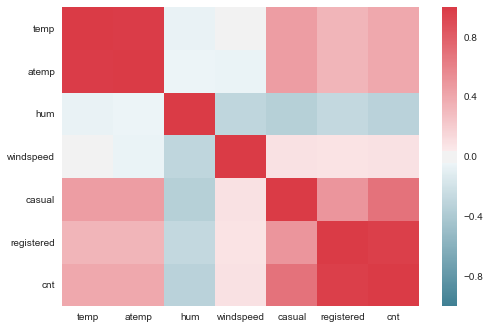

In [4]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = bike_data[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

P Values: [ 0.  0.]
Coefficients:  [ 406.58089227 -284.78986779]
y-intercept: 174.650440335
R-Squared: 0.252252602506


C:\Users\KuckChung\Anaconda2\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\KuckChung\Anaconda2\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

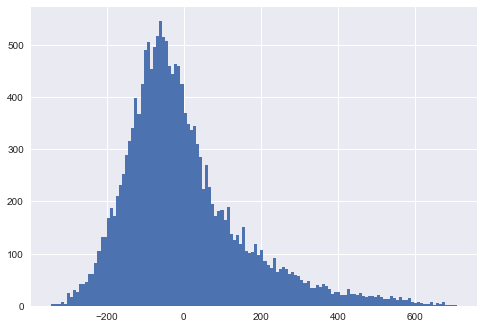

In [5]:
y = bike_data['cnt']
X = bike_data[['atemp', 'hum']]
get_linear_model_metrics(X, y, linear_model.LinearRegression())

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
P Values: [ 0.  0.]
Coefficients:  [ 374.19664658 -259.42004666]
y-intercept: 174.14537467
R-Squared: 0.2504971367

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
P Values: [ 0.  0.]
Coefficients:  [ 405.81372262 -284.38569354]
y-intercept: 174.761930806
R-Squared: 0.252251856969

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
P Values: [ 0.  0.]
Coefficients:  [ 22.59051006 -20.03044871]
y-intercept: 191.278760505
R-Squared: 0.029961866209



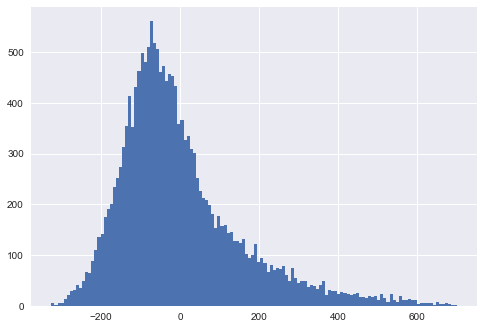

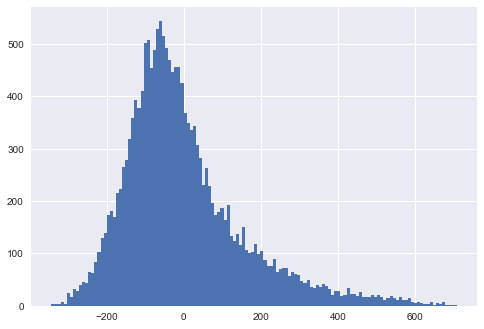

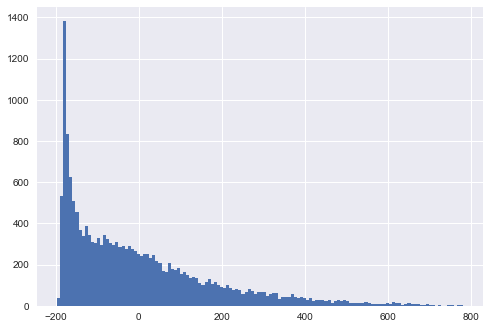

In [10]:
compare_advanced_estimators(bike_data[['atemp','hum']],bike_data['cnt'])

               temp       hum  windspeed  weather_1  weather_2  weather_3  \
temp       1.000000 -0.069881  -0.023125   0.101044  -0.069657  -0.062406   
hum       -0.069881  1.000000  -0.290105  -0.383425   0.220758   0.309737   
windspeed -0.023125 -0.290105   1.000000   0.005150  -0.049241   0.070018   
weather_1  0.101044 -0.383425   0.005150   1.000000  -0.822961  -0.412414   
weather_2 -0.069657  0.220758  -0.049241  -0.822961   1.000000  -0.177417   
weather_3 -0.062406  0.309737   0.070018  -0.412414  -0.177417   1.000000   
holiday   -0.027340 -0.010588   0.003988   0.009167   0.004910  -0.023664   
hour_1    -0.040738  0.083197  -0.053580   0.008819  -0.006750  -0.005379   
hour_2    -0.045627  0.096198  -0.060241   0.005156  -0.003921  -0.002518   
hour_3    -0.046575  0.108659  -0.065444  -0.001685   0.003843  -0.003117   
hour_4    -0.053459  0.121990  -0.057285  -0.000450   0.000506   0.000096   
hour_5    -0.065571  0.124406  -0.067411  -0.004791   0.011541  -0.010083   

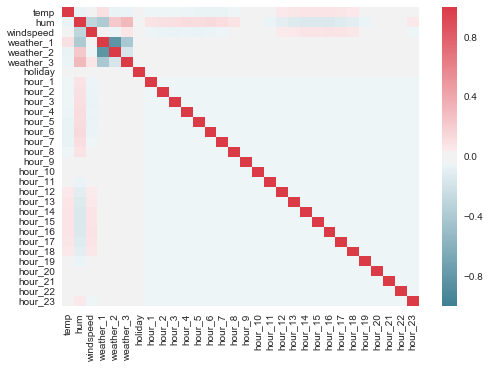

In [15]:
lm = linear_model.LinearRegression()
weather = pd.get_dummies(bike_data.weathersit)
weather.columns = ["weather_" + str(i) for i in weather.columns]

hours = pd.get_dummies(bike_data.hr)
hours.columns = ["hour_" + str(i) for i in hours.columns]

season = pd.get_dummies(bike_data.season)
season.columns = ["season_" + str(i) for i in season.columns]


bikemodel_data = bike_data.join(weather) # add in the three weather situations
bikemodel_data = bikemodel_data.join(hours)
bikemodel_data = bikemodel_data.join(season)

cmap = sns.diverging_palette(220, 10, as_cmap=True)

columns_to_keep = ["temp", "hum", "windspeed", "weather_1", "weather_2", "weather_3", "holiday",]
columns_to_keep.extend(["hour_" + str(i) for i in range(1, 24)])

correlations = bikemodel_data[columns_to_keep].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)